In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import model_selection

In [6]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

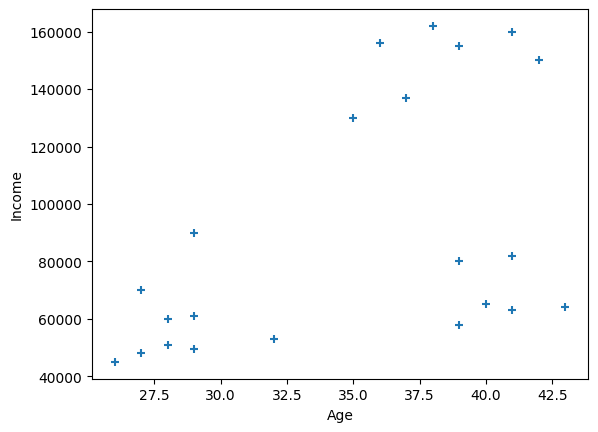

In [7]:
X = df['Age']
y = df['Income($)']
plt.scatter(X, y, marker='+')
plt.xlabel("Age")
plt.ylabel("Income")

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [15]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [14]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [16]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


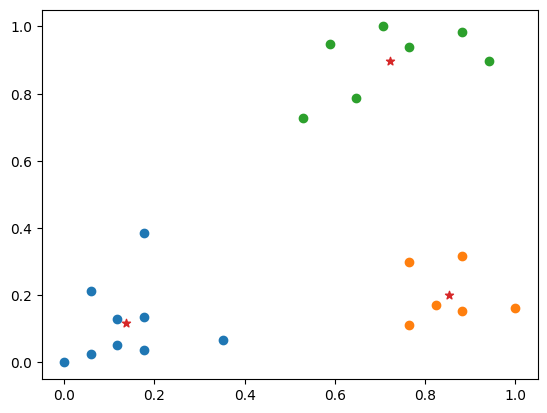

In [19]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
plt.scatter(df1['Age'], df1['Income($)'])
plt.scatter(df2['Age'], df2['Income($)'])
plt.scatter(df3['Age'], df3['Income($)'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*')

In [20]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

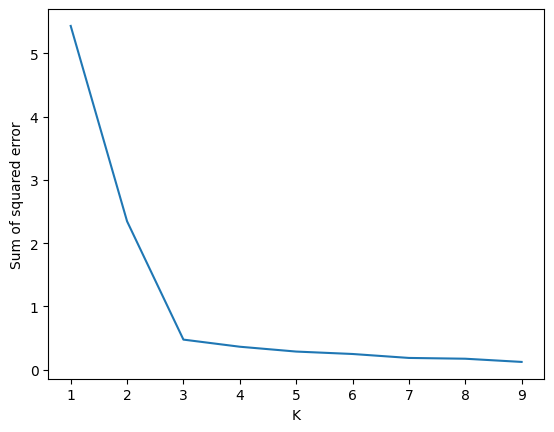

In [22]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')